In [22]:
## 1 - Import the Required Libraries

In [1]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

import eda_helper_functions

from sklearn.ensemble import IsolationForest

In [24]:
## 1 - Read the Training Data

In [2]:
file_path = r"C:\Users\DELL\Desktop\PD\Flight Price Prediction\Data\train.csv"

train = pd.read_csv(file_path)
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-04-01,Kolkata,Banglore,21:10:00,08:15:00,665,1.0,In-flight meal not included,8849
1,Indigo,2019-05-24,Banglore,Delhi,13:00:00,15:50:00,170,0.0,No Info,4990
2,Jet Airways,2019-04-27,Banglore,Delhi,17:45:00,20:45:00,180,0.0,In-flight meal not included,4544
3,Air India,2019-05-06,Kolkata,Banglore,12:00:00,11:10:00,1390,2.0,No Info,10676
4,Indigo,2019-05-01,Kolkata,Banglore,19:20:00,23:45:00,265,1.0,No Info,3809
...,...,...,...,...,...,...,...,...,...,...
635,Jet Airways,2019-03-09,Mumbai,Hyderabad,06:30:00,08:00:00,90,0.0,In-flight meal not included,4995
636,Multiple Carriers,2019-03-06,Delhi,Cochin,06:00:00,15:30:00,570,1.0,No Info,15147
637,Indigo,2019-03-24,Chennai,Kolkata,07:55:00,10:15:00,140,0.0,No Info,4326
638,Air Asia,2019-03-24,Banglore,New Delhi,05:50:00,08:40:00,170,0.0,No Info,4284


In [13]:
train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [14]:
train = train.assign(**{
	col: pd.to_datetime(train.loc[:, col], dayfirst=True, format="mixed")
	for col in ["date_of_journey", "dep_time", "arrival_time"]
})

train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

In [15]:
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-04-01,Kolkata,Banglore,2024-05-02 21:10:00,2024-05-02 08:15:00,665,1.0,In-flight meal not included,8849
1,Indigo,2019-05-24,Banglore,Delhi,2024-05-02 13:00:00,2024-05-02 15:50:00,170,0.0,No Info,4990
2,Jet Airways,2019-04-27,Banglore,Delhi,2024-05-02 17:45:00,2024-05-02 20:45:00,180,0.0,In-flight meal not included,4544
3,Air India,2019-05-06,Kolkata,Banglore,2024-05-02 12:00:00,2024-05-02 11:10:00,1390,2.0,No Info,10676
4,Indigo,2019-05-01,Kolkata,Banglore,2024-05-02 19:20:00,2024-05-02 23:45:00,265,1.0,No Info,3809
...,...,...,...,...,...,...,...,...,...,...
635,Jet Airways,2019-03-09,Mumbai,Hyderabad,2024-05-02 06:30:00,2024-05-02 08:00:00,90,0.0,In-flight meal not included,4995
636,Multiple Carriers,2019-03-06,Delhi,Cochin,2024-05-02 06:00:00,2024-05-02 15:30:00,570,1.0,No Info,15147
637,Indigo,2019-03-24,Chennai,Kolkata,2024-05-02 07:55:00,2024-05-02 10:15:00,140,0.0,No Info,4326
638,Air Asia,2019-03-24,Banglore,New Delhi,2024-05-02 05:50:00,2024-05-02 08:40:00,170,0.0,No Info,4284


In [16]:
## 3 - High Level Summary Of Data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          640 non-null    object        
 1   date_of_journey  640 non-null    datetime64[ns]
 2   source           640 non-null    object        
 3   destination      640 non-null    object        
 4   dep_time         640 non-null    datetime64[ns]
 5   arrival_time     640 non-null    datetime64[ns]
 6   duration         640 non-null    int64         
 7   total_stops      640 non-null    float64       
 8   additional_info  640 non-null    object        
 9   price            640 non-null    int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 50.1+ KB


In [17]:
train.describe(include="number")

,duration,total_stops,price
count,640.000000,640.000000,640.000000
mean,605.078125,0.796875,9025.621875
std,491.104590,0.666190,4526.472028
min,75.000000,0.000000,1840.000000
25%,170.000000,0.000000,4970.250000
50%,472.500000,1.000000,8372.000000
75%,865.000000,1.000000,12375.750000
max,2525.000000,3.000000,36235.000000


In [18]:
train.describe(include="O")

,airline,source,destination,additional_info
count,640,640,640,640
unique,9,5,6,5
top,Jet Airways,Delhi,Cochin,No Info
freq,234,268,268,502


In [19]:
(
	train
	.assign(total_stops=train["total_stops"].astype(object))
	.describe(include="O")
)

,airline,source,destination,total_stops,additional_info
count,640,640,640,640.0,640
unique,9,5,6,4.0,5
top,Jet Airways,Delhi,Cochin,1.0,No Info
freq,234,268,268,339.0,502


In [20]:
## 4 - High-level analysis of Missing Values - Use missingno
eda_helper_functions.missing_info(train)

,count,percentage
variable,,


In [21]:
## 5 - High Level Analysis of Outliers
forest = IsolationForest(n_estimators=10, random_state=42)

In [53]:
(
    train
    .assign(outlier = forest.fit_predict(train
                                         .drop(columns="price")
                                         .select_dtypes(include="number")))
    .query("outlier == -1")
    .duration
    .describe()
)

count     265.000000
mean      805.377358
std       642.594358
min        75.000000
25%       150.000000
50%       695.000000
75%      1390.000000
max      2525.000000
Name: duration, dtype: float64

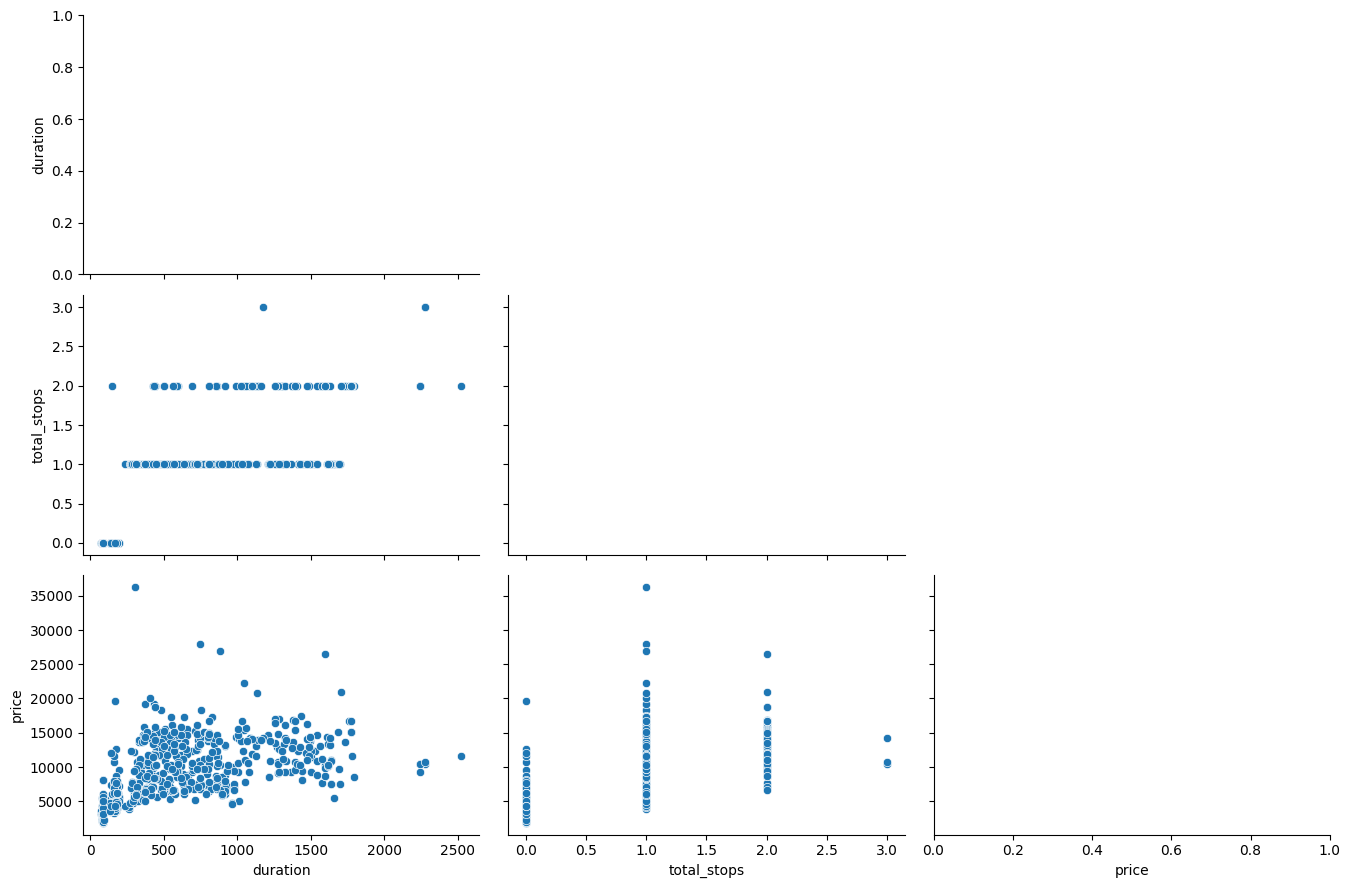

In [22]:
## 6 - Pair Plots
eda_helper_functions.pair_plots(train)

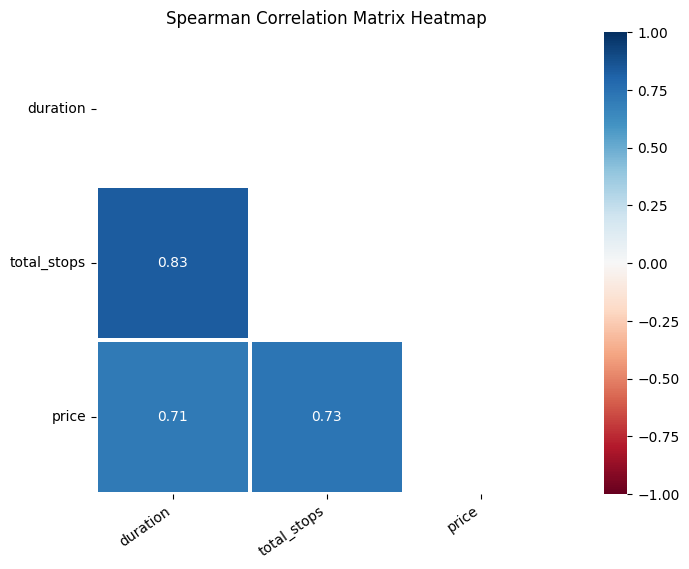

In [55]:
## 7 - Correlation Analysis
eda_helper_functions.correlation_heatmap(train)

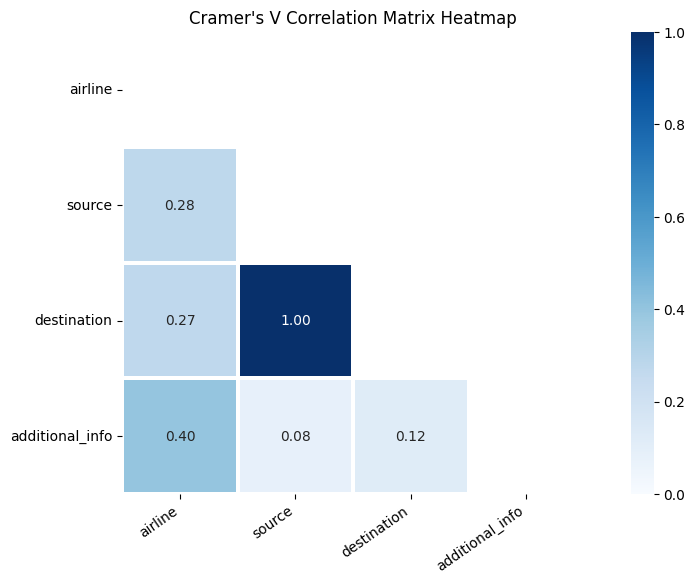

In [23]:
eda_helper_functions.cramersV_heatmap(train)

In [ ]:
## 8 - Detailed Analysis

In [3]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

In [4]:
## 8.1 - Airline
train.airline

0            Jet Airways
1                 Indigo
2            Jet Airways
3              Air India
4                 Indigo
             ...        
635          Jet Airways
636    Multiple Carriers
637               Indigo
638             Air Asia
639          Jet Airways
Name: airline, Length: 640, dtype: object

In [5]:
eda_helper_functions.cat_summary(train, "airline")

0            Jet Airways
1                 Indigo
2            Jet Airways
3              Air India
4                 Indigo
             ...        
635          Jet Airways
636    Multiple Carriers
637               Indigo
638             Air Asia
639          Jet Airways
Name: airline, Length: 640, dtype: object

Data Type      : object
Cardinality    : 9 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,9
top,Jet Airways
freq,234


,count,percentage
category,,
Jet Airways,234,0.365625
Indigo,132,0.206250
Air India,93,0.145313
Multiple Carriers,80,0.125000
Spicejet,49,0.076563
Vistara,21,0.032813
Air Asia,15,0.023438
Goair,15,0.023438
Multiple Carriers,1,0.001563


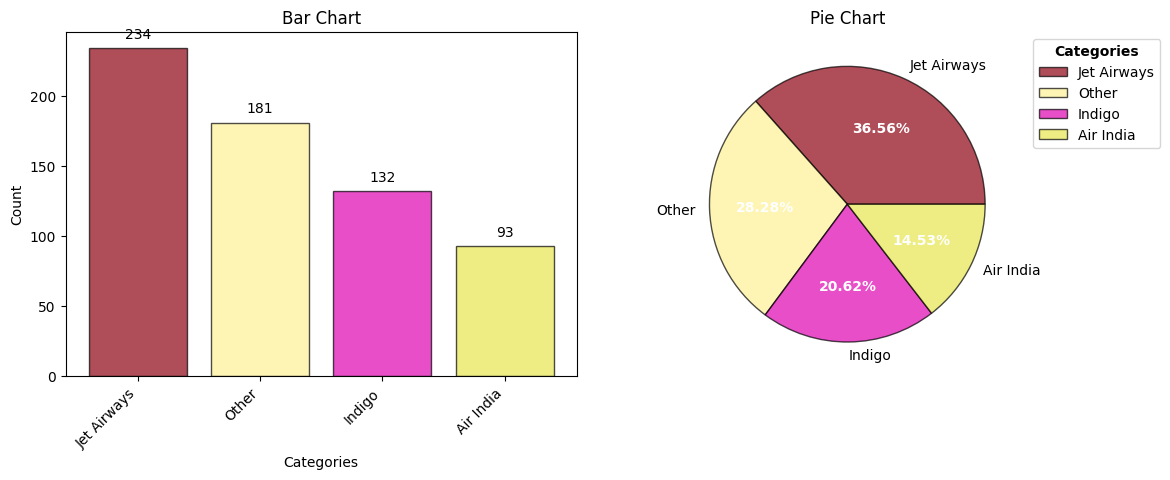

In [7]:
eda_helper_functions.cat_univar_plots(train, "airline", show_wordcloud=False, k=3) 

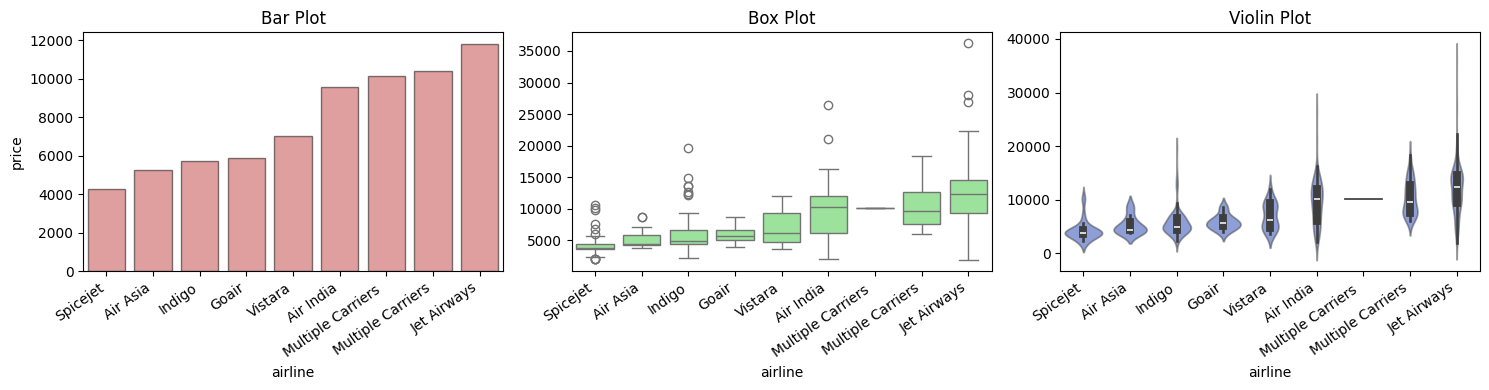

In [8]:
eda_helper_functions.num_cat_bivar_plots(
	data=train,
	num_var="price",
	cat_var="airline"
)  # Each one is a Axes.

In [9]:
eda_helper_functions.num_cat_hyp_testing(train, "price", "airline")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 48.953581438846925
- p-value              : 2.1205175378428252e-61
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 286.02497756835214
- p-value              : 3.868811785025092e-57
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


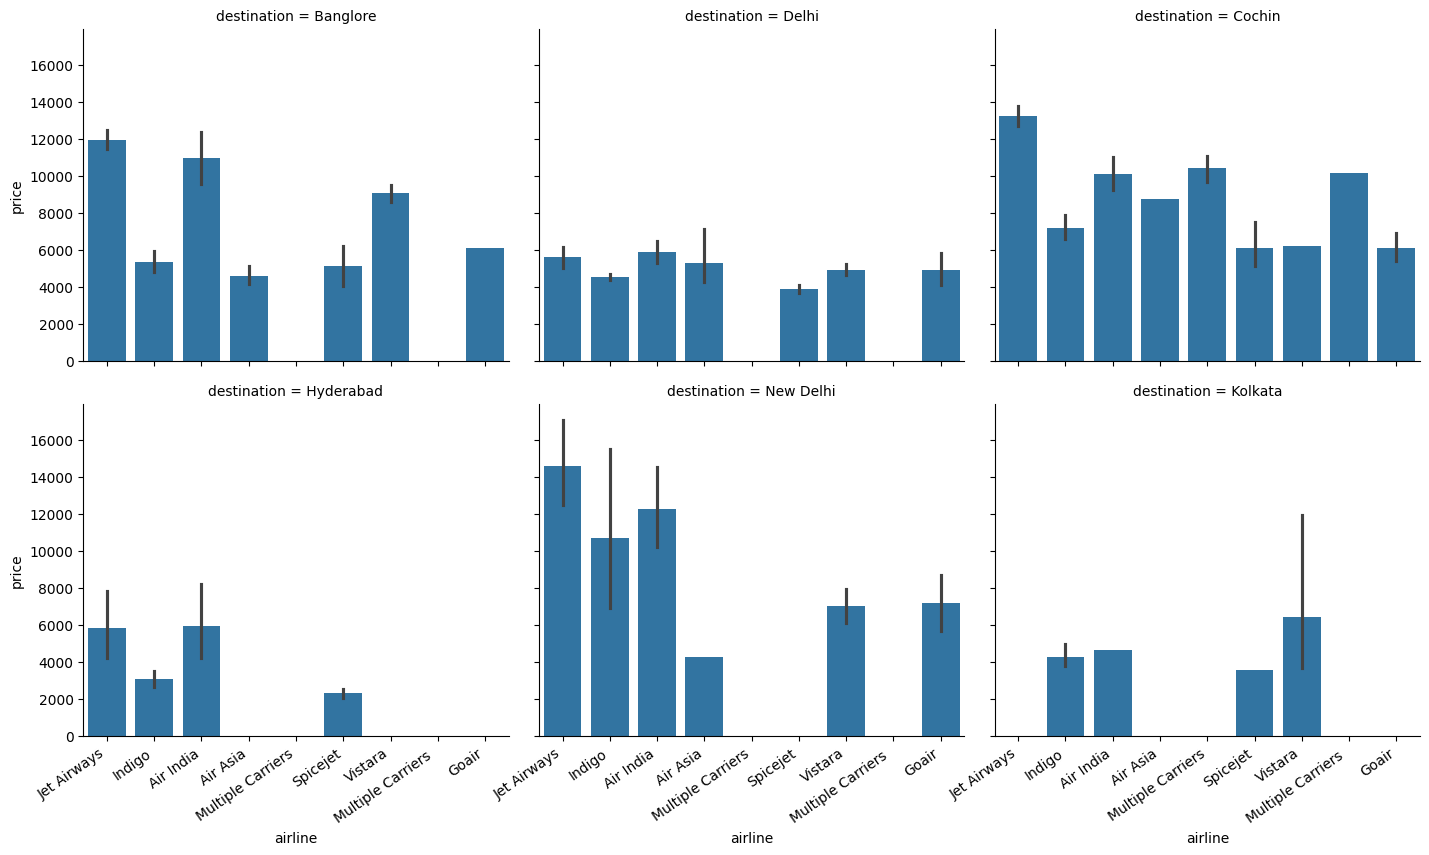

In [26]:
airline_grid = sns.FacetGrid(
	data=train,
	col="destination",
	col_wrap=3,
	height=4,
	aspect=1.2,
	sharey=True
)

airline_grid.map(sns.barplot, "airline", "price", order=train.airline.unique())

for ax in airline_grid.axes[3:]:
	eda_helper_functions.rotate_xlabels(ax)

In [ ]:
## 8.2 - date_of_journey 

In [27]:
train.date_of_journey

0     2019-04-01
1     2019-05-24
2     2019-04-27
3     2019-05-06
4     2019-05-01
         ...    
635   2019-03-09
636   2019-03-06
637   2019-03-24
638   2019-03-24
639   2019-06-03
Name: date_of_journey, Length: 640, dtype: datetime64[ns]

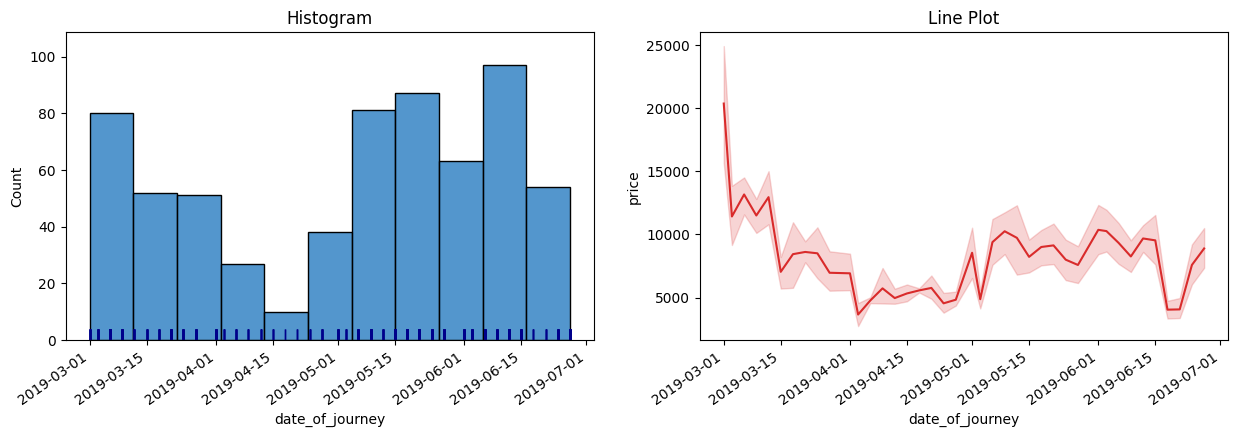

In [25]:
eda_helper_functions.dt_univar_plots(
	data=train,
	var="date_of_journey",
	target="price"
)

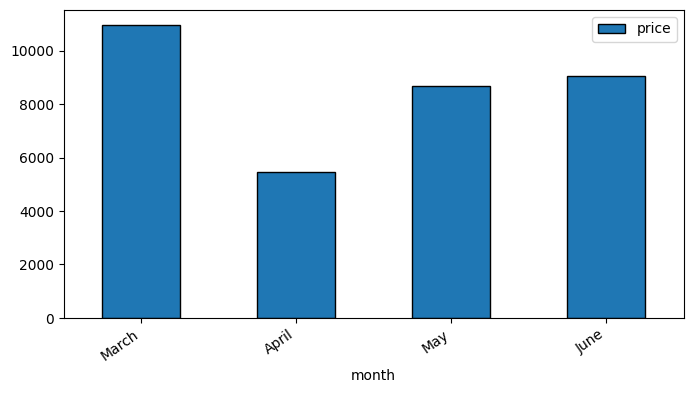

In [28]:
(
	train
	.groupby(pd.Grouper(key="date_of_journey", freq="M"))
	.price.mean()
	.to_frame()
	.set_axis(["March", "April", "May", "June"], axis=0)
	.rename_axis(index="month")
	.plot(
		kind="bar",
		figsize=(8, 4),
		edgecolor="black"
	)
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

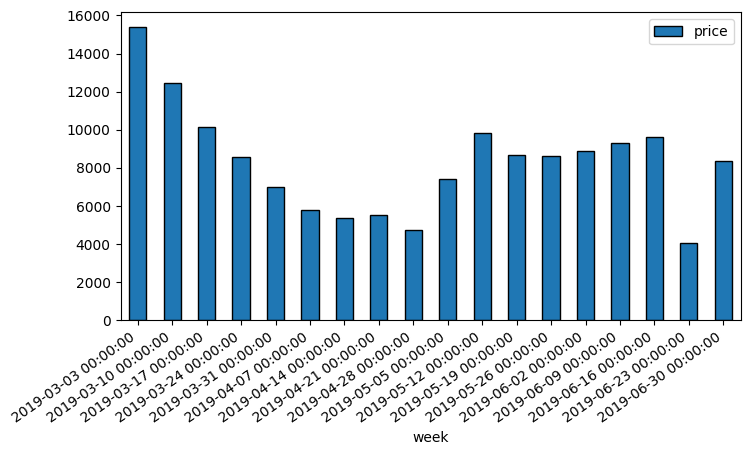

In [29]:
(
	train
	.groupby(pd.Grouper(key="date_of_journey", freq="W"))
	.price.mean()
	.to_frame()
	.rename_axis(index="week")
	.plot(
		kind="bar",
		figsize=(8, 4),
		edgecolor="black"
	)
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

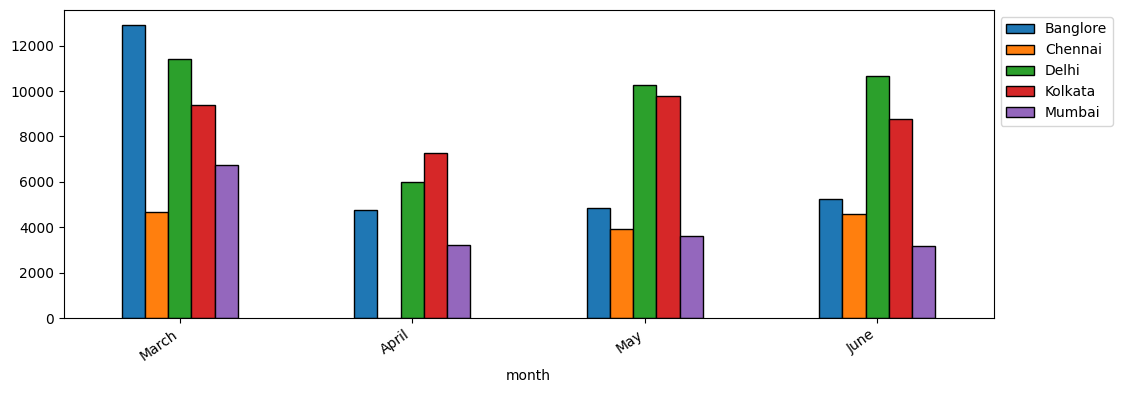

In [30]:
(
	train
	.groupby([pd.Grouper(key="date_of_journey", freq="M"), "source"])
	.price.mean()
	.unstack(fill_value=0)
	.set_axis(["March", "April", "May", "June"], axis=0)
	.rename_axis(index="month")
	.plot(
		kind="bar",
		figsize=(12, 4),
		edgecolor="black"
	)
)

ax = plt.gca()

ax.legend(
	loc="upper left",
	bbox_to_anchor=(1, 1)
)

eda_helper_functions.rotate_xlabels(ax)

In [ ]:
## 8.3 - dep_time

In [31]:
train.dep_time

0     2024-05-02 21:10:00
1     2024-05-02 13:00:00
2     2024-05-02 17:45:00
3     2024-05-02 12:00:00
4     2024-05-02 19:20:00
              ...        
635   2024-05-02 06:30:00
636   2024-05-02 06:00:00
637   2024-05-02 07:55:00
638   2024-05-02 05:50:00
639   2024-05-02 16:00:00
Name: dep_time, Length: 640, dtype: datetime64[ns]

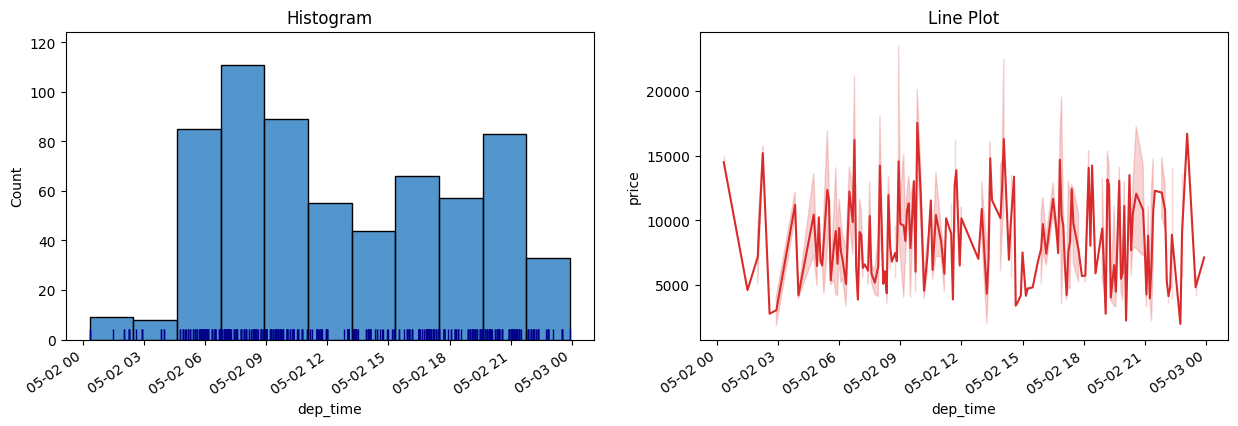

In [32]:
eda_helper_functions.dt_univar_plots(train, "dep_time", "price")

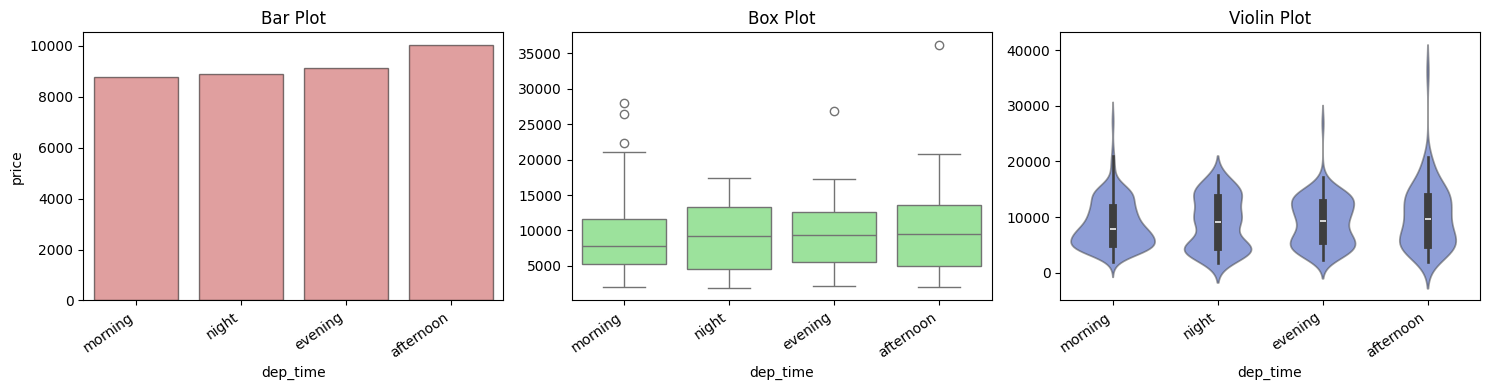

In [33]:
(
	train
	.assign(dep_time=lambda df_: (
		np.select([df_.dep_time.dt.hour.between(4, 12, inclusive="left"),
				   df_.dep_time.dt.hour.between(12, 16, inclusive="left"),
				   df_.dep_time.dt.hour.between(16, 20, inclusive="left")],
				  ["morning", "afternoon", "evening"],
				  default="night")
	))
	.pipe(eda_helper_functions.num_cat_bivar_plots, "price", "dep_time")
)

In [ ]:
## 8.4 - Duration

In [34]:
train.duration

0       665
1       170
2       180
3      1390
4       265
       ... 
635      90
636     570
637     140
638     170
639    1620
Name: duration, Length: 640, dtype: int64

In [35]:
eda_helper_functions.num_summary(train, "duration")

0       665
1       170
2       180
3      1390
4       265
       ... 
635      90
636     570
637     140
638     170
639    1620
Name: duration, Length: 640, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,value
percentile,
0,75.00
5,90.00
10,140.00
25,170.00
50,472.50
75,865.00
90,1392.00
95,1595.25
99,1789.15


,value
mean,605.078125
trimmed mean (5%),567.812500
trimmed mean (10%),538.271484
median,472.500000


,value
var,241183.718457
std,491.104590
IQR,695.000000
mad,307.500000
coef_variance,0.811638


,value
skewness,1.046079
kurtosis,0.453752


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 5.658590326586909e-22
Test Statistic       : 0.8782590170848954
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.782
Test Statistic       : 24.596401342984336
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


In [36]:
train.duration.quantile([0.25, 0.5, 0.75])

0.25    170.0
0.50    472.5
0.75    865.0
Name: duration, dtype: float64

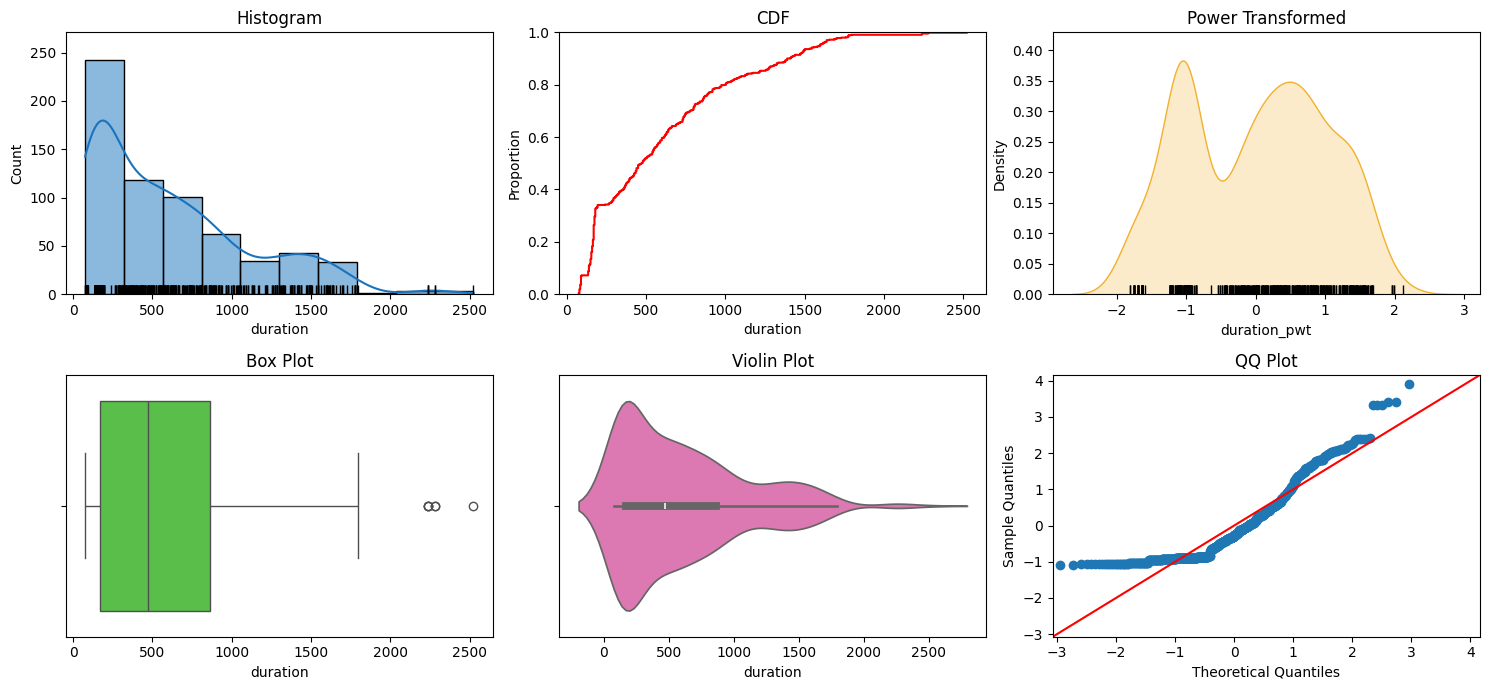

In [37]:
eda_helper_functions.num_univar_plots(train, "duration")

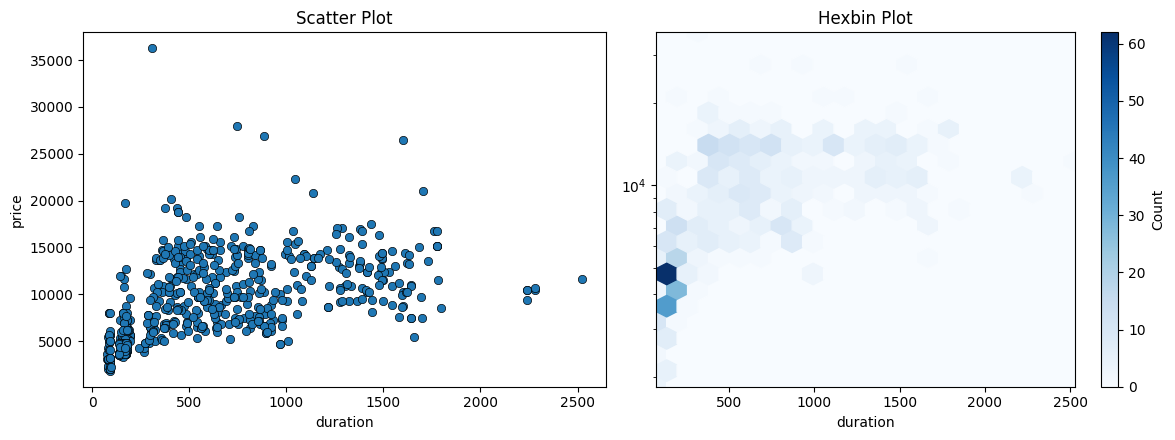

In [38]:
eda_helper_functions.num_bivar_plots(
	train,
	"duration",
	"price",
	hexbin_kwargs=dict(
		yscale="log",
		gridsize=20,
		cmap="Blues"
	)
)

In [39]:
eda_helper_functions.num_num_hyp_testing(train, "price", "duration")

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.5415762222631971
- p-value              : 4.668015300589263e-50
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.708036619176807
- p-value              : 1.7988107930205937e-98
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


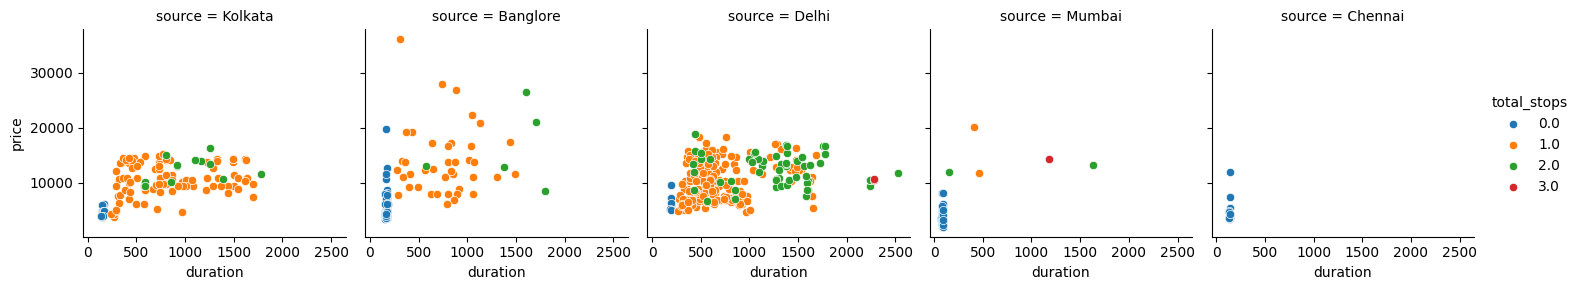

In [40]:
duration_grid = sns.FacetGrid(
	data=train,
	col="source",
	hue="total_stops",
	sharey=True
)

duration_grid.map(sns.scatterplot, "duration", "price")

duration_grid.add_legend()

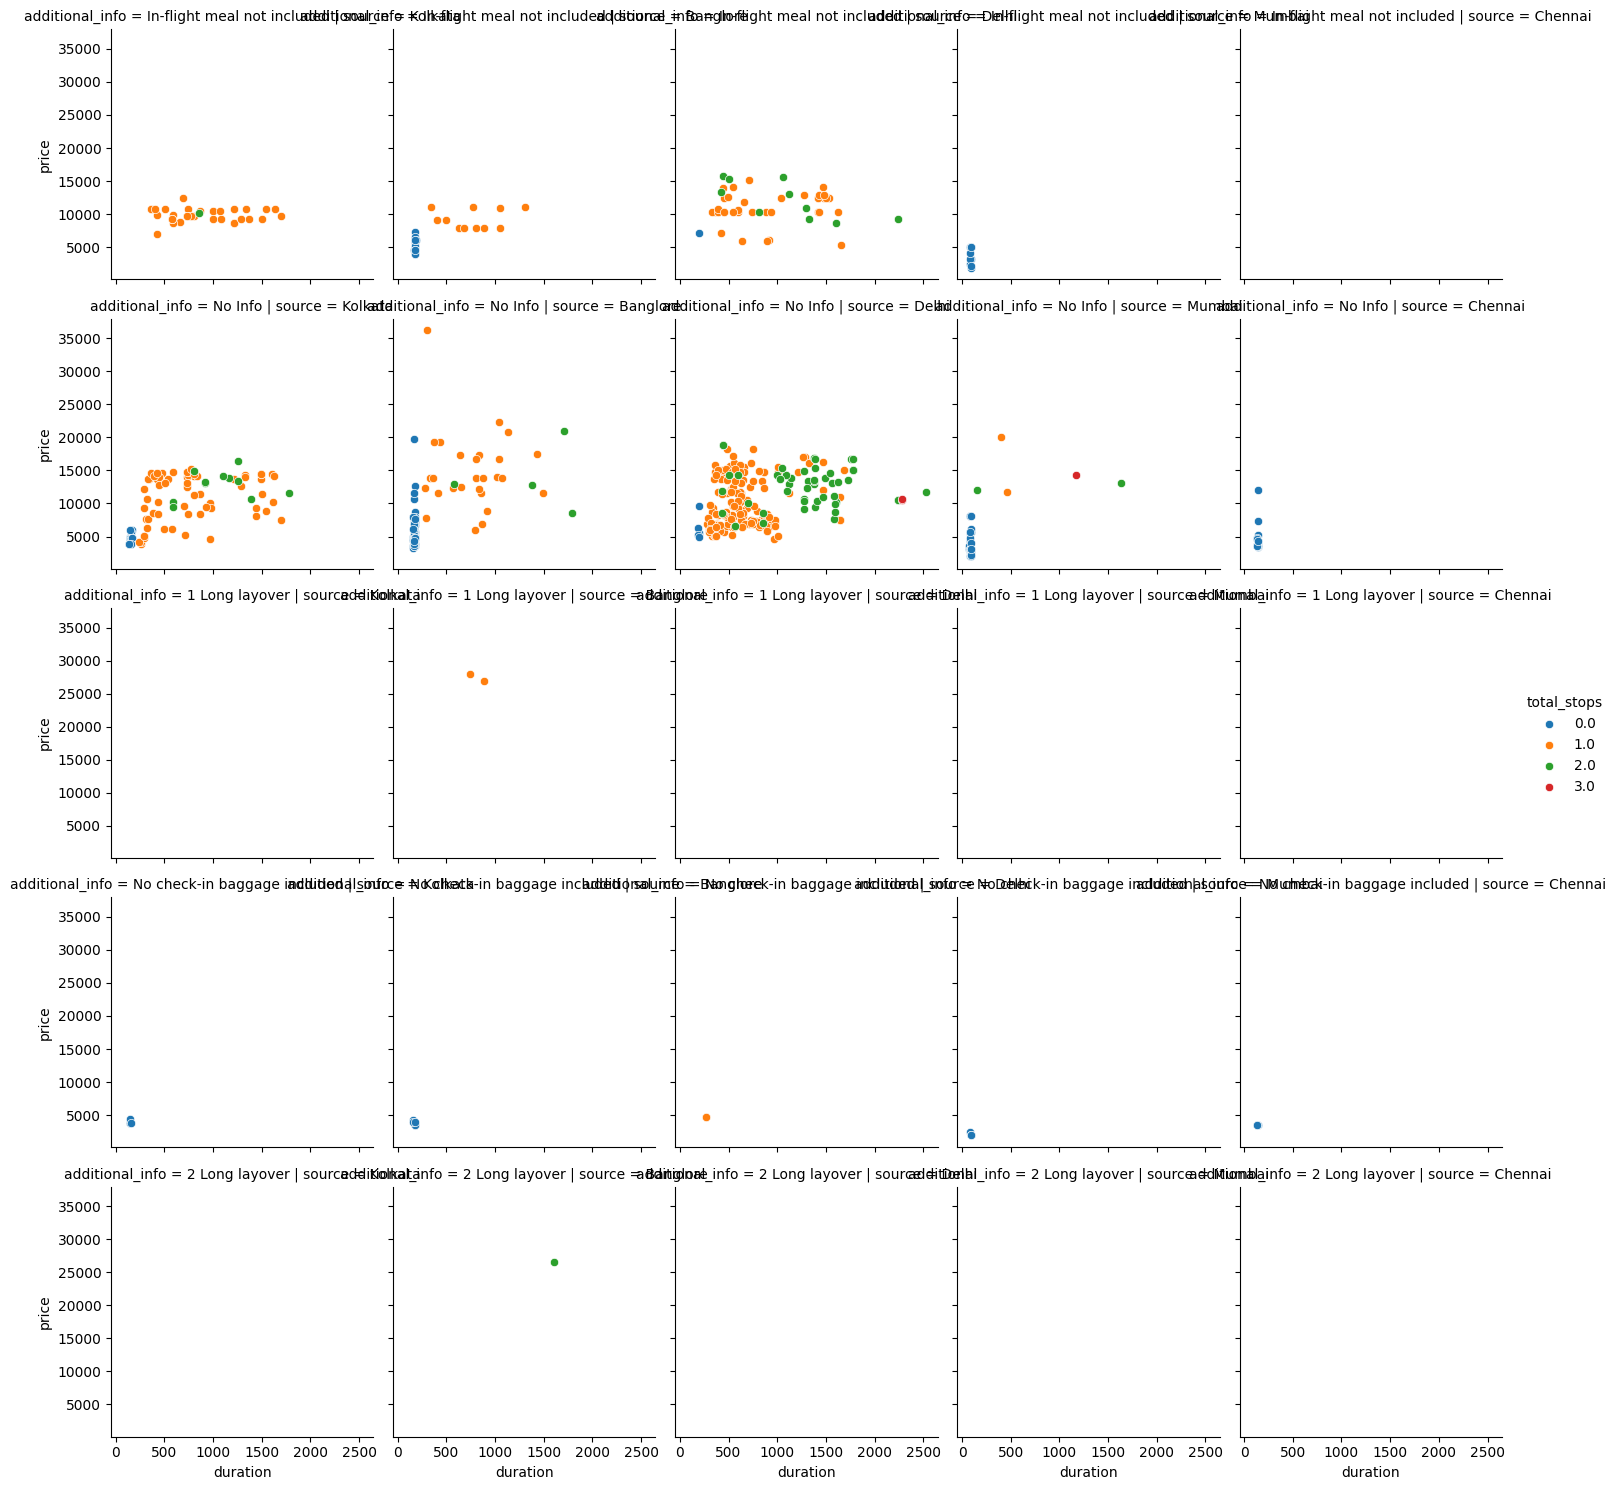

In [41]:
duration_grid = sns.FacetGrid(
	data=train,
	col="source",
	row="additional_info",
	hue="total_stops",
	sharey=True
)

duration_grid.map(sns.scatterplot, "duration", "price")

duration_grid.add_legend()

In [42]:
eda_helper_functions.get_iqr_outliers(train, "duration")

Lower Limit : -872.5
Upper Limit : 1907.5


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
253,Jet Airways,2019-03-21,Delhi,Cochin,2024-05-02 05:30:00,2024-05-02 18:50:00,2240,2.0,In-flight meal not included,9328
406,Air India,2019-06-09,Delhi,Cochin,2024-05-02 05:55:00,2024-05-02 19:15:00,2240,2.0,No Info,10493
479,Air India,2019-05-21,Delhi,Cochin,2024-05-02 05:55:00,2024-05-02 19:15:00,2240,2.0,No Info,10493
317,Air India,2019-06-24,Delhi,Cochin,2024-05-02 05:15:00,2024-05-02 19:15:00,2280,3.0,No Info,10493
507,Air India,2019-06-06,Delhi,Cochin,2024-05-02 05:15:00,2024-05-02 19:15:00,2280,3.0,No Info,10703
286,Jet Airways,2019-03-21,Delhi,Cochin,2024-05-02 10:20:00,2024-05-02 04:25:00,2525,2.0,No Info,11664


In [ ]:
## 8.5 - addtional_info

In [43]:
eda_helper_functions.cat_summary(train, "additional_info")

0      In-flight meal not included
1                          No Info
2      In-flight meal not included
3                          No Info
4                          No Info
                  ...             
635    In-flight meal not included
636                        No Info
637                        No Info
638                        No Info
639    In-flight meal not included
Name: additional_info, Length: 640, dtype: object

Data Type      : object
Cardinality    : 5 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,5
top,No Info
freq,502


,count,percentage
category,,
No Info,502,0.784375
In-flight meal not included,117,0.182812
No check-in baggage included,18,0.028125
1 Long layover,2,0.003125
2 Long layover,1,0.001563


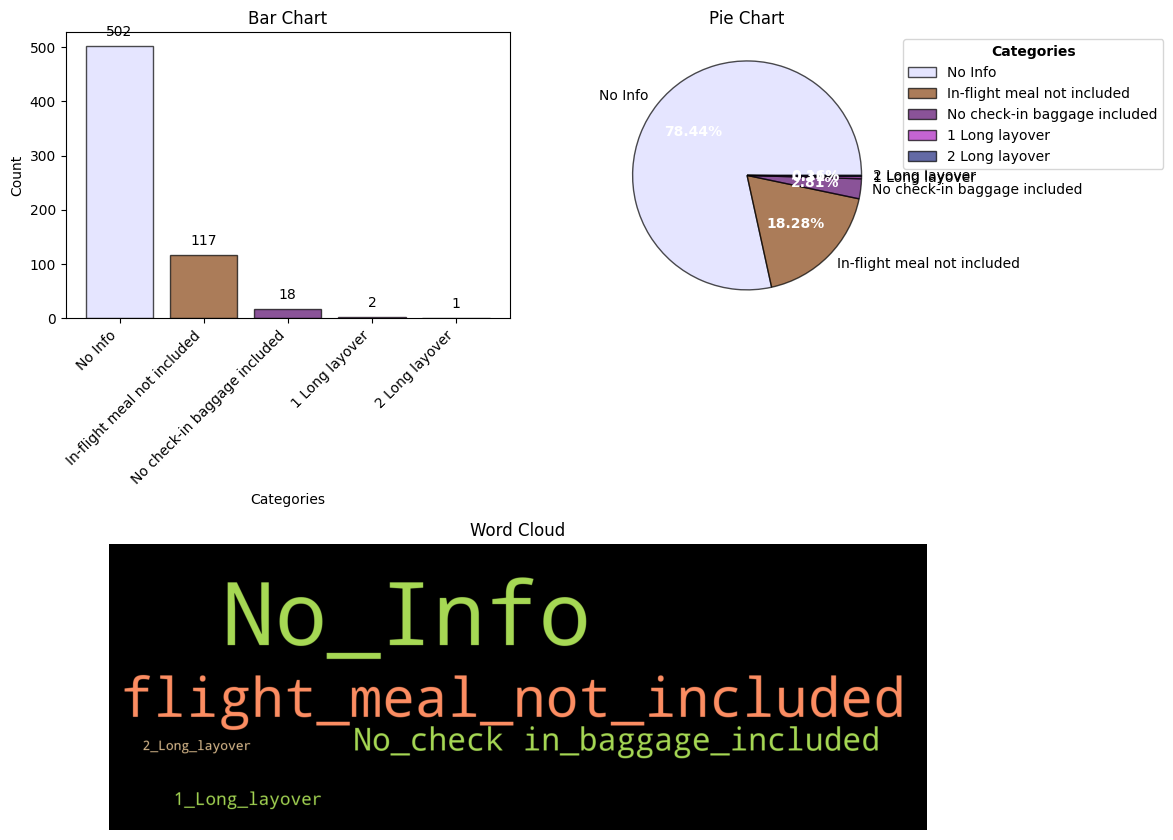

In [44]:
eda_helper_functions.cat_univar_plots(train, "additional_info")

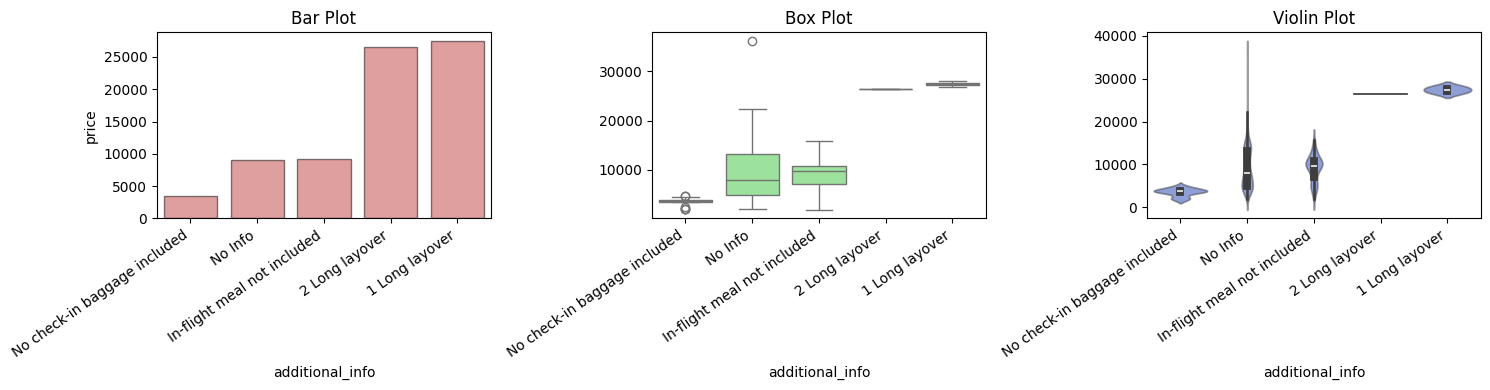

In [45]:
eda_helper_functions.num_cat_bivar_plots(train, "price", "additional_info")

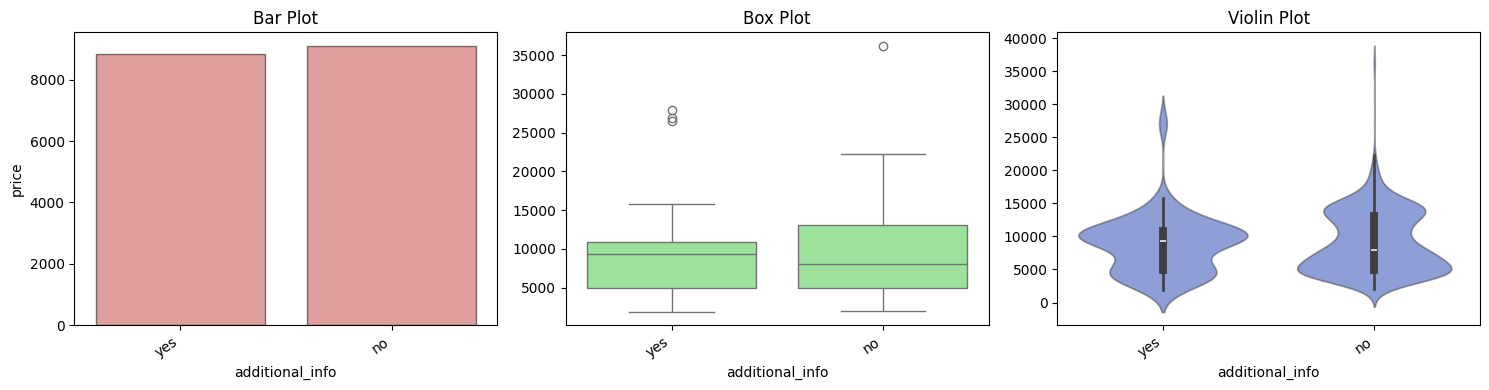

In [46]:
# convertion additional_info into a binary feature for analysis

(
	train
	.assign(additional_info=(
		train
		.additional_info
		.pipe(lambda ser: np.where(ser.eq("No Info"), "no", "yes"))
	))
	.pipe(eda_helper_functions.num_cat_bivar_plots, "price", "additional_info")
)